In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import isoweek  # Pour gérer les semaines ISO

In [55]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"
data = "monthly_in_situ_co2_mlo.csv"
# Vérifier si le fichier local existe, et s'il n'existe pas, le télécharger depuis l'URL
import os
import urllib.request

# Vérifier si le fichier local n'existe pas
if not os.path.exists(data):
    # Télécharger les données depuis l'URL et les enregistrer dans le fichier local
    urllib.request.urlretrieve(data_url, data)

In [56]:
# Lire les données depuis le fichier local CSV en sautant la première ligne (commentaire)
raw_data = pd.read_csv(data, skiprows=57)

# Afficher les données brutes
raw_data

Yr   Mn      Date         Date       CO2  seasonally          fit  \
0                                                  adjusted                
1                  Excel                  [ppm]      [ppm]         [ppm]   
2    1958   01     21200    1958.0411    -99.99      -99.99       -99.99   
3    1958   02     21231    1958.1260    -99.99      -99.99       -99.99   
4    1958   03     21259    1958.2027    315.71      314.44       316.19   
5    1958   04     21290    1958.2877    317.45      315.16       317.30   
6    1958   05     21320    1958.3699    317.51      314.69       317.89   
7    1958   06     21351    1958.4548    -99.99      -99.99       317.27   
8    1958   07     21381    1958.5370    315.87      315.20       315.86   
9    1958   08     21412    1958.6219    314.93      316.21       313.97   
10   1958   09     21443    1958.7068    313.21      316.11       312.44   
11   1958   10     21473    1958.7890    -99.99      -99.99       312.42   
12   1958   11     21504    1958.8740    313.33      315.21       313.61   
13   1958   12     21534    1958.9562    314.67      315.43       314.77   
14   1959   01     21565    1959.0411    315.58      315.52       315.64   
15   1959   02     21596    1959.1260    316.49      315.84       316.29   
16   1959   03     21624    1959.2027    316.65      315.38       316.98   
17   1959   04     21655    1959.2877    317.72      315.42       318.09   
18   1959   05     21685    1959.3699    318.29      315.46       318.68   
19   1959   06     21716    1959.4548    318.15      316.00       318.07   
20   1959   07     21746    1959.5370    316.54      315.87       316.67   
21   1959   08     21777    1959.6219    314.80      316.09       314.80   
22   1959   09     21808    1959.7068    313.84      316.75       313.30   
23   1959   10     21838    1959.7890    313.33      316.34       313.31   
24   1959   11     21869    1959.8740    314.81      316.69       314.53   
25   1959   12     21899    1959.9562    315.58      316.35       315.72   
26   1960   01     21930    1960.0410    316.43      316.37       316.63   
27   1960   02     21961    1960.1257    316.98      316.33       317.29   
28   1960   03     21990    1960.2049    317.58      316.28       318.03   
29   1960   04     22021    1960.2896    319.03      316.70       319.14   
..    ...  ...       ...          ...       ...         ...          ...   
764  2021   07     44392    2021.5370    416.65      415.85       416.95   
765  2021   08     44423    2021.6219    414.34      415.89       414.78   
766  2021   09     44454    2021.7068    412.90      416.40       413.04   
767  2021   10     44484    2021.7890    413.55      417.16       413.14   
768  2021   11     44515    2021.8740    414.82      417.08       414.69   
769  2021   12     44545    2021.9562    416.43      417.36       416.19   
770  2022   01     44576    2022.0411    418.01      417.94       417.34   
771  2022   02     44607    2022.1260    418.99      418.21       418.21   
772  2022   03     44635    2022.2027    418.45      416.92       419.11   
773  2022   04     44666    2022.2877    420.02      417.25       420.50   
774  2022   05     44696    2022.3699    420.77      417.36       421.27   
775  2022   06     44727    2022.4548    420.68      418.09       420.60   
776  2022   07     44757    2022.5370    418.68      417.87       418.98   
777  2022   08     44788    2022.6219    416.76      418.31       416.80   
778  2022   09     44819    2022.7068    415.41      418.91       415.07   
779  2022   10     44849    2022.7890    415.31      418.93       415.18   
780  2022   11     44880    2022.8740    417.04      419.31       416.74   
781  2022   12     44910    2022.9562    418.57      419.49       418.27   
782  2023   01     44941    2023.0411    419.24      419.17       419.46   
783  2023   02     44972    2023.1260    420.33      419.55       420.38   
784  2023   03     45000    2023.2027    420.51      41

In [57]:
# Sélectionner les lignes contenant au moins une valeur manquante (NaN)
raw_data[raw_data.isnull().any(axis=1)]

Yr   Mn      Date        Date       CO2  seasonally          fit  \
0                                               adjusted                
1                Excel                 [ppm]      [ppm]         [ppm]   

     seasonally           CO2       seasonally  Sta  
0  adjusted fit        filled  adjusted filled  NaN  
1         [ppm]         [ppm]            [ppm]  NaN

In [58]:
# Supprimer les lignes contenant des valeurs manquantes (NaN) à partir des données brutes
data = raw_data.dropna().copy()

# Afficher les données nettoyées (sans valeurs manquantes) et en créer une copie
data

Yr   Mn      Date         Date       CO2 seasonally          fit  \
2    1958   01     21200    1958.0411    -99.99     -99.99       -99.99   
3    1958   02     21231    1958.1260    -99.99     -99.99       -99.99   
4    1958   03     21259    1958.2027    315.71     314.44       316.19   
5    1958   04     21290    1958.2877    317.45     315.16       317.30   
6    1958   05     21320    1958.3699    317.51     314.69       317.89   
7    1958   06     21351    1958.4548    -99.99     -99.99       317.27   
8    1958   07     21381    1958.5370    315.87     315.20       315.86   
9    1958   08     21412    1958.6219    314.93     316.21       313.97   
10   1958   09     21443    1958.7068    313.21     316.11       312.44   
11   1958   10     21473    1958.7890    -99.99     -99.99       312.42   
12   1958   11     21504    1958.8740    313.33     315.21       313.61   
13   1958   12     21534    1958.9562    314.67     315.43       314.77   
14   1959   01     21565    1959.0411    315.58     315.52       315.64   
15   1959   02     21596    1959.1260    316.49     315.84       316.29   
16   1959   03     21624    1959.2027    316.65     315.38       316.98   
17   1959   04     21655    1959.2877    317.72     315.42       318.09   
18   1959   05     21685    1959.3699    318.29     315.46       318.68   
19   1959   06     21716    1959.4548    318.15     316.00       318.07   
20   1959   07     21746    1959.5370    316.54     315.87       316.67   
21   1959   08     21777    1959.6219    314.80     316.09       314.80   
22   1959   09     21808    1959.7068    313.84     316.75       313.30   
23   1959   10     21838    1959.7890    313.33     316.34       313.31   
24   1959   11     21869    1959.8740    314.81     316.69       314.53   
25   1959   12     21899    1959.9562    315.58     316.35       315.72   
26   1960   01     21930    1960.0410    316.43     316.37       316.63   
27   1960   02     21961    1960.1257    316.98     316.33       317.29   
28   1960   03     21990    1960.2049    317.58     316.28       318.03   
29   1960   04     22021    1960.2896    319.03     316.70       319.14   
30   1960   05     22051    1960.3716    320.03     317.20       319.70   
31   1960   06     22082    1960.4563    319.58     317.45       319.04   
..    ...  ...       ...          ...       ...        ...          ...   
764  2021   07     44392    2021.5370    416.65     415.85       416.95   
765  2021   08     44423    2021.6219    414.34     415.89       414.78   
766  2021   09     44454    2021.7068    412.90     416.40       413.04   
767  2021   10     44484    2021.7890    413.55     417.16       413.14   
768  2021   11     44515    2021.8740    414.82     417.08       414.69   
769  2021   12     44545    2021.9562    416.43     417.36       416.19   
770  2022   01     44576    2022.0411    418.01     417.94       417.34   
771  2022   02     44607    2022.1260    418.99     418.21       418.21   
772  2022   03     44635    2022.2027    418.45     416.92       419.11   
773  2022   04     44666    2022.2877    420.02     417.25       420.50   
774  2022   05     44696    2022.3699    420.77     417.36       421.27   
775  2022   06     44727    2022.4548    420.68     418.09       420.60   
776  2022   07     44757    2022.5370    418.68     417.87       418.98   
777  2022   08     44788    2022.6219    416.76     418.31       416.80   
778  2022   09     44819    2022.7068    415.41     418.91       415.07   
779  2022   10     44849    2022.7890    415.31     418.93       415.18   
780  2022   11     44880    2022.8740    417.04     419.31       416.74   
781  2022   12     44910    2022.9562    418.57     419.49       418.27   
782  2023   01     44941    2023.0411    419.24     419.17       419.46   
783  2023   02     44972    2023.1260    420.33     419.55       420.38   
784  2023   03     45000    2023.2027    420.51     418.97       421.34   
785  2023   04     45031    2023

In [59]:
data = data.dropna(subset=['     CO2'])

In [60]:
print(data.columns)

Index(['  Yr', ' Mn', '    Date', '      Date', '     CO2', 'seasonally',
       '        fit', '  seasonally', '      CO2', ' seasonally', ' Sta'],
      dtype='object')


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


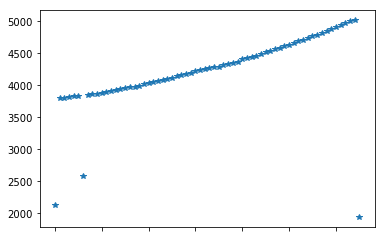

In [61]:
#question1
# Grouper par année (Yr) et sommer les valeurs de CO2
annees = data['  Yr'].unique()  # Obtenir la liste des années uniques

# Initialiser les listes pour stocker les années et les émissions de CO2 annuelles
year = []  # Liste des années
yearly_CO2 = []  # Liste des émissions annuelles de CO2

for annee in annees:
    # Filtrer les données pour l'année spécifique
    donnees_annee = data[data['  Yr'] == annee]
    
    # Somme des émissions de CO2 pour l'année spécifique
    donnees_annee['     CO2'] = donnees_annee['     CO2'].astype(float)
    somme_co2_annee = donnees_annee['     CO2'].sum()
    
    # Ajouter l'année et la somme des émissions à leurs listes respectives
    year.append(annee)
    yearly_CO2.append(somme_co2_annee)

# Créer une série pandas avec les données annuelles et les années comme index
yearly_CO2 = pd.Series(data=yearly_CO2, index=year)
# Tracer un graphique de dispersion des données d'incidence annuelle avec un style en étoile
yearly_CO2.plot(style='*')

Le code fourni a pour objectif d'effectuer une analyse des composantes périodiques d'un jeu de données de concentrations de CO2 à l'aide de la transformation de Fourier en utilisant Python. Il commence par charger les données à partir d'un fichier CSV dans un DataFrame Pandas. Ensuite, il identifie la colonne appropriée contenant les données de concentration de CO2 et la convertit en format numérique (float) pour s'assurer que les données sont traitées correctement. Une fois les données préparées, le code applique la transformation de Fourier pour analyser les composantes périodiques dans les données. La sortie de cette analyse est ensuite visualisée dans le domaine de fréquence, montrant les amplitudes des différentes composantes périodiques. Ce type d'analyse est utile pour détecter des modèles saisonniers ou cycliques dans les données de CO2, ce qui peut avoir des implications significatives dans le domaine de la climatologie et de l'environnement. Assurez-vous de personnaliser le code en remplaçant 'CO2' par le nom de la colonne réelle contenant les données de CO2 de votre ensemble de données.

Fréquence dominante (période la plus importante) en années: inf


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


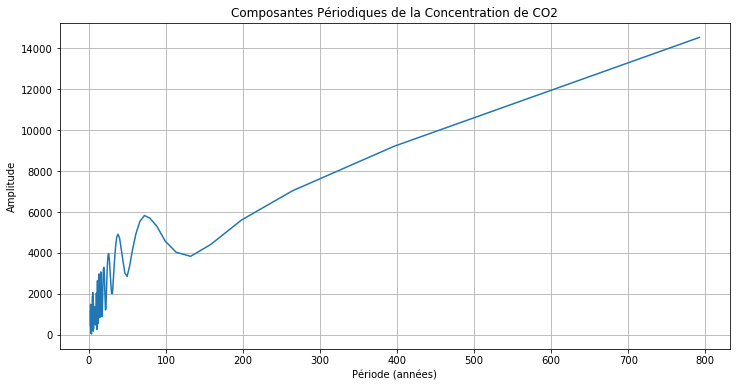

In [23]:
dates = data["  Yr"]  # Colonne des dates
co2_concentration_series = data["     CO2"].astype(float)  # Colonne de concentration de CO2 (avant ajustement saisonnier)

# Appliquer la transformation de Fourier pour identifier les composantes périodiques
co2_concentration = co2_concentration_series.values
fourier_transform = np.fft.fft(co2_concentration)
frequencies = np.fft.fftfreq(len(co2_concentration))
amplitudes = np.abs(fourier_transform)

# Trouver les fréquences dominantes (composantes périodiques)
# Dans cet exemple, nous considérons les fréquences positives seulement (ignore les négatives)
positive_frequencies = frequencies[:len(frequencies) // 2]
positive_amplitudes = amplitudes[:len(amplitudes) // 2]

# Identifier la fréquence dominante (correspondant à la période la plus importante)
dominant_frequency = positive_frequencies[np.argmax(positive_amplitudes)]

# Créer un graphique pour montrer les composantes périodiques
plt.figure(figsize=(12, 6))
plt.plot(1 / positive_frequencies, positive_amplitudes)  # Période au lieu de fréquence
plt.title("Composantes Périodiques de la Concentration de CO2")
plt.xlabel("Période (années)")
plt.ylabel("Amplitude")
plt.grid(True)

# Afficher la fréquence dominante
print("Fréquence dominante (période la plus importante) en années:", 1 / dominant_frequency)

plt.show()

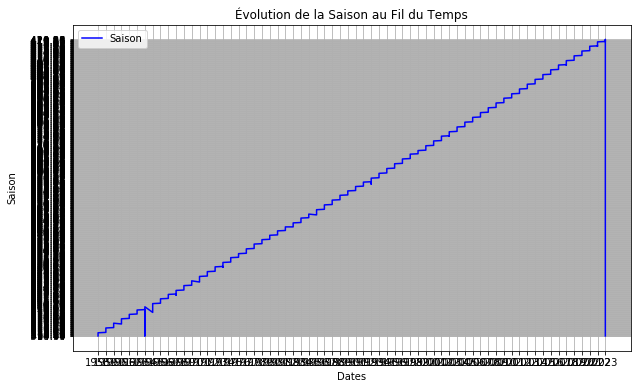

In [27]:
# Extrayez les colonnes "dates" et "saison"
dates = data['  Yr']
saison = data['seasonally']

# Créez un graphique avec les données
plt.figure(figsize=(10, 6))
plt.plot(dates, saison, label='Saison', color='blue')
plt.title('Évolution de la Saison au Fil du Temps')
plt.xlabel('Dates')
plt.ylabel('Saison')
plt.legend()
plt.grid(True)

# Affichez le graphique
plt.show()

In [26]:
#question2
from statsmodels.tsa.seasonal import seasonal_decompose
data = data.assign(Jr=1)
# Créez une colonne de date en combinant Year et Month
data['Date'] = pd.to_datetime(data[['  Yr', ' Mn', 'Jr']].assign(day=1))

# Supprimez les colonnes Year et Month si nécessaire
data = data.drop(['  Yr', ' Mn', 'Jr'], axis=1)

# Assurez-vous que 'Date' est un objet DateTime pour définir la fréquence
data['Date'] = pd.to_datetime(data['Date'])

# Décomposez les données en tendance, saisonnalité et résidus en spécifiant la fréquence
decomposition = seasonal_decompose(data['     CO2'], model='additive', freq=12)  # Ici, 'freq=12' indique une fréquence mensuelle

# Extraire la tendance, la saisonnalité et les résidus
tendance = decomposition.trend
saisonnalite = decomposition.seasonal
residus = decomposition.resid



# Tracer les composantes
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(data['  Yr'], data['     CO2'], label='Données originales')
plt.legend()
plt.subplot(412)
plt.plot(data['  Yr'], tendance, label='Tendance')
plt.legend()
plt.subplot(413)
plt.plot(data['  Yr'], saisonnalite, label='Saisonnalité')
plt.legend()
plt.subplot(414)
plt.plot(data['  Yr'], residus, label='Résidus')
plt.legend()
plt.tight_layout()
plt.show()

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [month,year] is missing

In [ ]:
#question3
from sklearn.linear_model import LinearRegression

# Créer un modèle de régression linéaire
regression = LinearRegression()

# Ajuster le modèle aux données de tendance
regression.fit(data['Date'].values.reshape(-1, 1), data['CO2'])

# Obtenir les paramètres du modèle
pente = regression.coef_
intercept = regression.intercept_

# Extrapoler les valeurs jusqu'en 2025
annee_2025 = 2025
co2_2025 = regression.predict([[annee_2025]])[0]

# Afficher les résultats
print(f"Équation de la régression linéaire : CO2 = {pente[0]} * Année + {intercept}")
print(f"Concentration de CO2 estimée pour 2025 : {co2_2025} ppm")
